# 지역별 소득 수준 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr
from scipy.stats import probplot
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['AppleGothic']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
count_by_area = pd.read_csv("medical-facility-location.csv")
count_by_area

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수,평균 미세먼지 농도
0,강남구,81053206.0,10,201,93867,56.00
1,서초구,80510746.0,5,141,76176,65.40
2,용산구,69795335.0,2,66,27345,54.25
3,송파구,55703664.0,4,257,106008,57.60
4,성동구,52498140.0,2,114,38125,62.20
5,종로구,52233029.0,6,49,17365,54.80
6,마포구,51249929.0,1,131,51366,59.80
7,중구,49499323.0,3,59,12773,56.80
8,양천구,49391500.0,5,101,79006,62.00
9,영등포구,47450278.0,6,136,48396,62.60


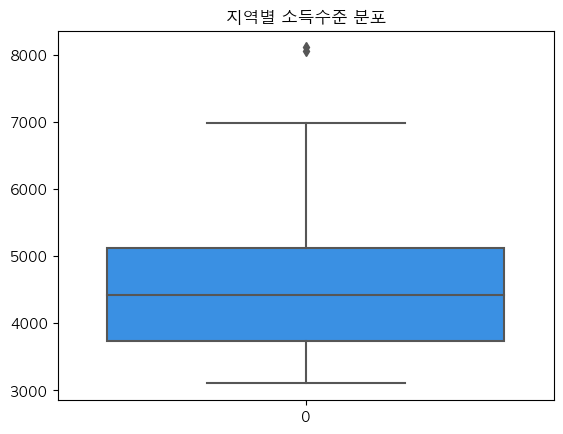

In [3]:
sns.boxplot(count_by_area['1인당 총 급여'] / 10000, color='dodgerblue')
plt.title('지역별 소득수준 분포')
plt.show()

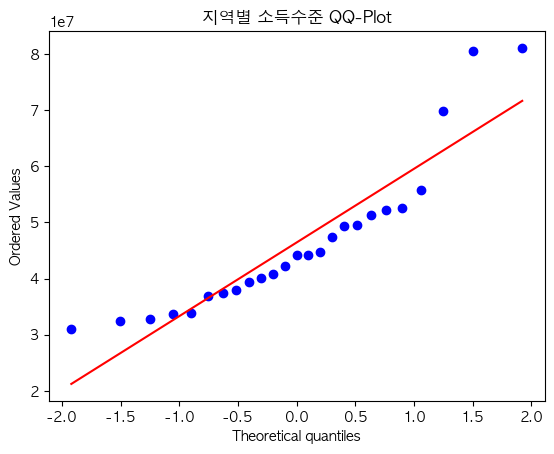

In [4]:
probplot(count_by_area['1인당 총 급여'], plot=plt)
plt.title('지역별 소득수준 QQ-Plot')
plt.show()

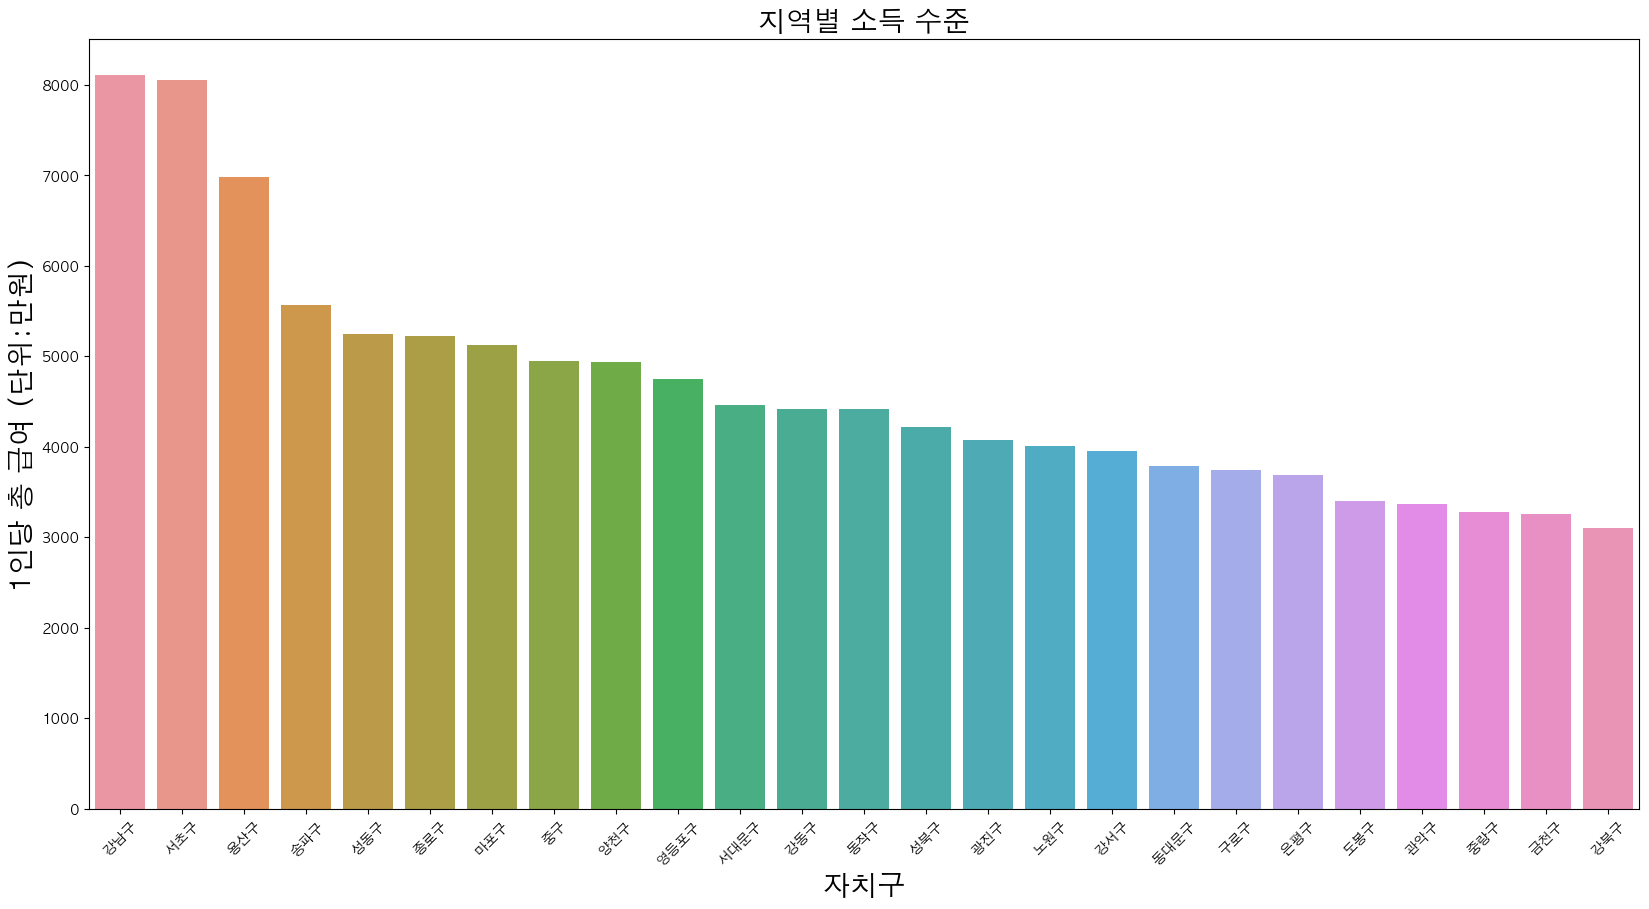

In [5]:
# EDA
# 지역별 소득 수준 시각화
plt.figure(figsize=(20, 10))
# sns.barplot(data=count_by_area, x='자치구', y='1인당 총 급여')
sns.barplot(x=count_by_area['자치구'], y=count_by_area['1인당 총 급여'] / 10000)
plt.xticks(rotation=45)
plt.xlabel('자치구', fontsize=20)
plt.ylabel('1인당 총 급여 (단위:만원)', fontsize=20)
plt.title('지역별 소득 수준', fontsize=20)
plt.show()

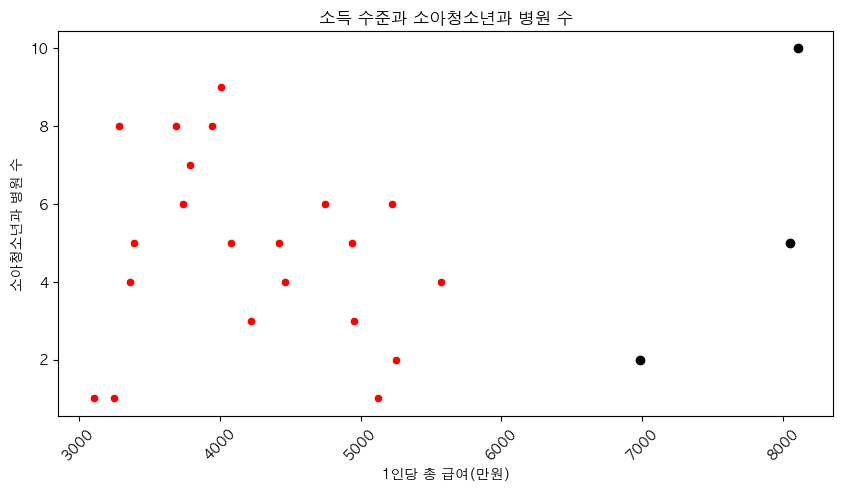

In [19]:
# 지역별 소아청소년과 병원 수 시각화
# 이상치는 검은색으로 표시

plt.figure(figsize=(10, 5))
sns.scatterplot(data=count_by_area, x=np.round(count_by_area['1인당 총 급여'] / 10000, 0), y='소아청소년과 병원 수', color='red')
plt.scatter(x=np.round(count_by_area['1인당 총 급여'] / 10000, 0)[count_by_area['1인당 총 급여'] > 60000000], y=count_by_area['소아청소년과 병원 수'][count_by_area['1인당 총 급여'] > 60000000], color='black', edgecolor='black')

plt.xticks(rotation=45)
plt.xlabel('1인당 총 급여(만원)')
plt.title('소득 수준과 소아청소년과 병원 수')
plt.show()

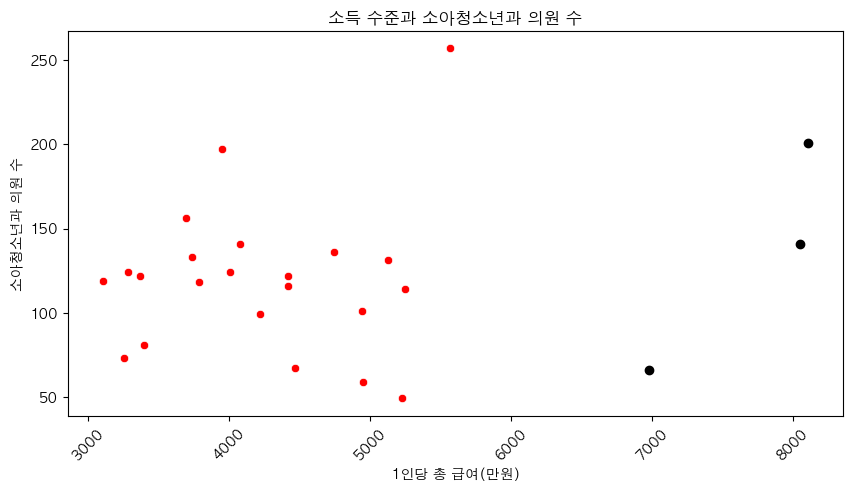

In [15]:
# 지역별 소아청소년과 의원 수 시각화
# 이상치는 검은색으로 표시

plt.figure(figsize=(10, 5))
sns.scatterplot(data=count_by_area, x=np.round(count_by_area['1인당 총 급여'] / 10000, 0), y='소아청소년과 의원 수', color='red')
plt.scatter(x=np.round(count_by_area['1인당 총 급여'] / 10000, 0)[count_by_area['1인당 총 급여'] > 60000000], y=count_by_area['소아청소년과 의원 수'][count_by_area['1인당 총 급여'] > 60000000], color='black', edgecolor='black')

plt.xticks(rotation=45)
plt.xlabel('1인당 총 급여(만원)')
plt.title('소득 수준과 소아청소년과 의원 수')
plt.show()

## 가설 01: 지역의 소득 수준과 소아청소년과 병원의 개수는 관련이 있을 것이다.

In [27]:
from scipy.stats import pearsonr

pearsonr(count_by_area['1인당 총 급여'], count_by_area['소아청소년과 병원 수'])

PearsonRResult(statistic=0.06753461215520816, pvalue=0.7483984365532081)

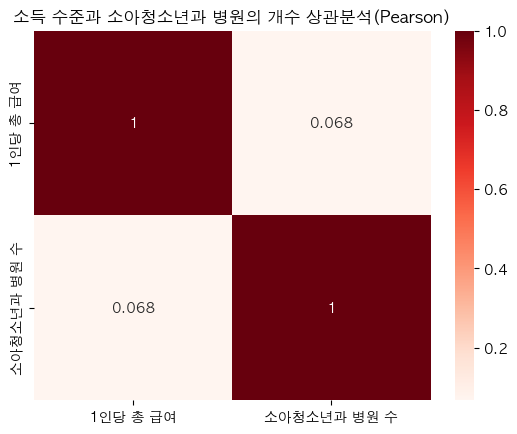

In [28]:
sns.heatmap(count_by_area[['1인당 총 급여', '소아청소년과 병원 수']].corr( method='pearson'), annot=True, cmap='Reds')
plt.title('소득 수준과 소아청소년과 병원의 개수 상관분석(Pearson)')
plt.show()

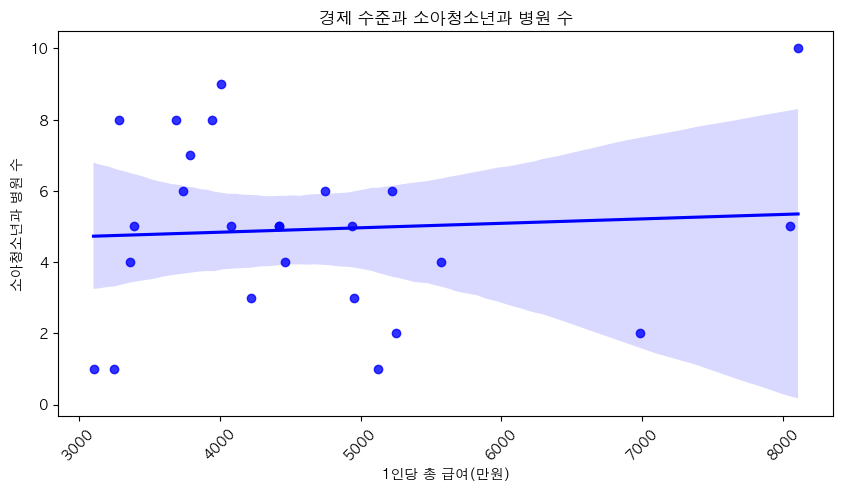

In [8]:
plt.figure(figsize=(10, 5))
sns.regplot(data=count_by_area, x=np.round(count_by_area['1인당 총 급여'] / 10000, 0), y='소아청소년과 병원 수', color='blue')
plt.xticks(rotation=45)
plt.xlabel('1인당 총 급여(만원)')
plt.title('경제 수준과 소아청소년과 병원 수')



plt.show()

### 가설 검정 01 결론: 경제 수준과 소아청소년과 병원의 수가 연관이 있다고 보기는 어렵다. <br />
pearson 상관 계수 결과 p-value 0.7, statistic 0.06으로 나왔다. <br />
또한 시각화를 해봤을 때에도 뚜렷한 상관성을 찾지 못했다.

## 가설 02: 지역의 소득 수준과 소아청소년과 의원의 개수는 관련이 있을 것이다.

In [30]:
pearsonr(count_by_area['1인당 총 급여'], count_by_area['소아청소년과 의원 수'])

PearsonRResult(statistic=0.1986954841756121, pvalue=0.34101833818291766)

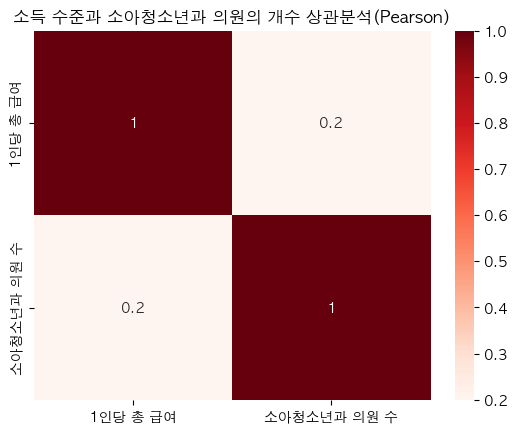

In [29]:
sns.heatmap(count_by_area[['1인당 총 급여', '소아청소년과 의원 수']].corr(method='pearson'), annot=True, cmap='Reds')
plt.title('소득 수준과 소아청소년과 의원의 개수 상관분석(Pearson)')
plt.show()

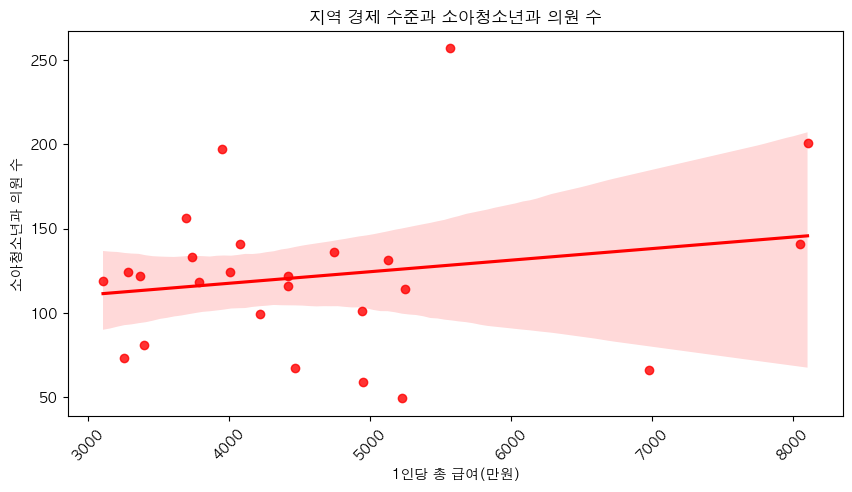

In [11]:
plt.figure(figsize=(10, 5))
sns.regplot(data=count_by_area, x=np.round(count_by_area['1인당 총 급여'] / 10000, 0), y='소아청소년과 의원 수', color='red')
plt.xticks(rotation=45)
plt.xlabel('1인당 총 급여(만원)')
plt.title('지역 경제 수준과 소아청소년과 의원 수')
plt.show()

### 가설 검정 02 결론: 경제 수준과 소아청소년과 의원의 수가 연관이 있다고 보기는 어렵다. <br />
pearson 상관 계수 결과 p-value 0.19, statistic 0.34로 나왔다. <br />
또한 시각화를 해봤을 때에도 뚜렷한 상관성을 찾지 못했다.